<a href="https://colab.research.google.com/github/JulioHenri/Analise-Restaurante/blob/master/An%C3%A1lise_restaurante_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Neste trabalho irei fazer um análise exploratória de dados de dados disponibilizados no curso de Data Visualization: Explorando com Seaborn da Alura. 

Este projeto se trata de dados de um restaurante fictício dispondo de 6 variáveis e 3416 registros. Analisarei os dados gerando gráficos, analisando de maneira descritiva e buscando responder possíveis problemas de negócios no âmbito dos restaurantes.

# Importando as bibliotecas

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Lendo e visualizando os dados

In [16]:
url = 'https://raw.githubusercontent.com/JulioHenri/Analise-Restaurante/master/code-and-dataset/tips_atualizado.csv'
dados = pd.read_csv(url)
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

## Trocando os nomes das colunas para melhor entendimento

In [17]:
dados.columns=['valor_da_conta','gorjeta','sobremesa','dia',
               'hora_do_dia','total_de_pessoas']
dados.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Trocando os valores das colunas de variáveis categóricas para melhor entendimento 

In [18]:
dados.sobremesa.replace(['No','Yes'],['Não','Sim'],inplace=True)
dados.dia.replace(['Sun', 'Sat', 'Thur', 'Fri'],['Dom','Sab','Qui','Sex'],inplace=True)
dados.hora_do_dia.replace(['Dinner', 'Lunch'],['Jantar','Almoço'],inplace=True)

# Análise 1 - Valor da conta e gorjeta

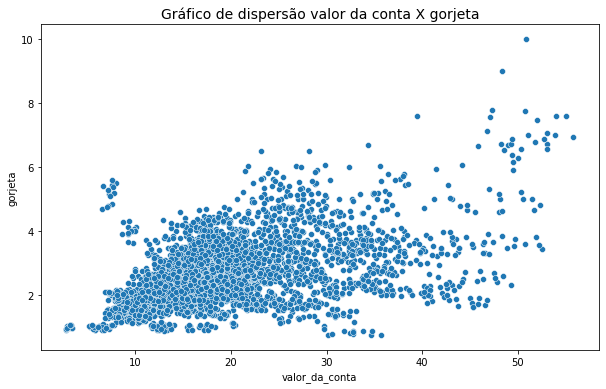

In [23]:
plt.figure(figsize = [10, 6])

ax = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=dados)
ax.set_title('Gráfico de dispersão valor da conta X gorjeta', fontsize=14)
ax


Pode-se induzir uma possível tendência, observando que conforme o valor da conta aumenta, o valor da gorjeta também aumenta, mas essa tendência não se apresenta claramente.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    3416 non-null   float64
 1   gorjeta           3416 non-null   float64
 2   sobremesa         3416 non-null   object 
 3   dia               3416 non-null   object 
 4   hora_do_dia       3416 non-null   object 
 5   total_de_pessoas  3416 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 160.2+ KB


## Criando nova coluna com porcentagem da gorjeta

In [25]:
dados['porcentagem_gorjeta'] = (dados.gorjeta / dados.valor_da_conta).round(2)
dados.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas,porcentagem_gorjeta
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


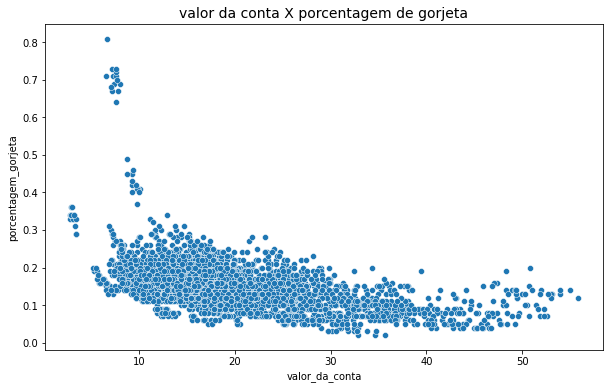

In [26]:
plt.figure(figsize = [10, 6])

ax = sns.scatterplot(x='valor_da_conta',y='porcentagem_gorjeta',data=dados) 
ax.set_title('valor da conta X porcentagem de gorjeta', fontsize=14)
ax 

Ao tirar a porcentagem da gorjeta, podemos observar melhor a relação do quanto o cliente ofereceu de gorjeta e do valor de sua conta. Então, aparentemente, o valor de porcentagem da gorjeta não altera de acordo com o valor da conta, permanecendo "constante".

# Análise 2 - Sobremesa

In [ ]:
dados[dados.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem_gorjeta
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [ ]:
dados[dados.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem_gorjeta
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


A partir das descrições acima, pode-se analisar certos pontos. A média e o desvio padrão do valor da conta de quem comeu e não comeu a sobremesa estão bem próximos um do outro, bem como na variável gorjeta. Por outro lado, o desvio padrão da variável porcentagem_gorjeta está maior quando o cliente pede sobremesa, além disso, o valor máximo dessa mesma variável está maior que o dobro em relação a quem não pediu sobremesa.

Isso indica uma dispersão maior nos dados de clientes que pedem a sobremesa.

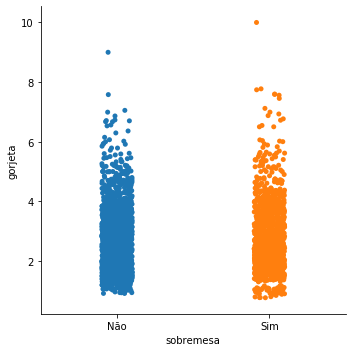

In [ ]:
ax = sns.catplot(x='sobremesa',y='gorjeta',data=dados) #gráfico de dispersão de variável categórica

Não parece ter grande diferença entre Sim e Não

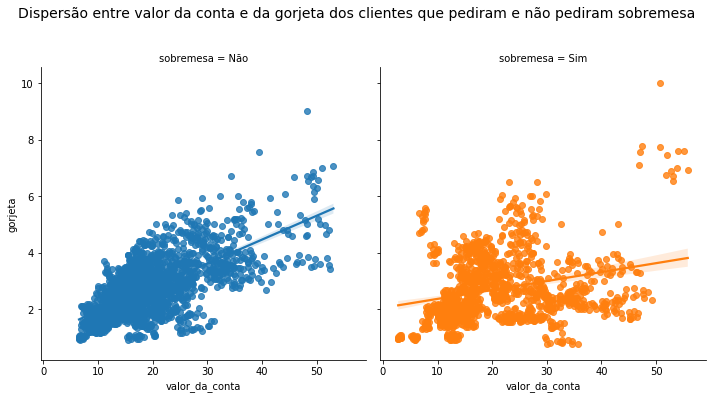

In [ ]:
ax=sns.lmplot(x='valor_da_conta',y='gorjeta',data=dados,hue='sobremesa',col='sobremesa')
ax.fig.suptitle('Dispersão entre valor da conta e da gorjeta dos clientes que pediram e não pediram sobremesa', fontsize=14, y=1.1)
ax

Através desses gráficos pude notar que os dois gráficos são crescentes, contudo, a crescente de quem não pediu sobremesa é maior em relação a de quem pediu sobremesa. Isso indica que, em média, quem não pede sobremesa tem maior chance de dar uma gorjeta maior do que aqueles que pediram sobremesa.

Visualizando o gráfico, pode-se notar que o desvio padrão padrão que parecia próximo nos dois grupos, é maior em quem pede a sobremesa, o que explica o valor máximo da porcentagem das gorjetas serem maior em quem pede sobremesa.

# Teste de hipótese 

Teste de hipótese nada mais é que um ferramente estatística que auxilia na generalização de uma amostra para a população. Para fazermos isso, é necessário de hipóteses estatísticas, que são suposições que podem ou não ser verdadeiras. Ou seja, essa metodologia nos ajuda a tomar decisões com base em parâmetros estabelecidos. Atráves do teste de hipótese buscamos responder a pergunta "Os dados da minha amostram se comportam da mesma maneira ou dinheiro de dados da População?", dito isso, iremos utilizar da lib **scipy** o método **ranksums**, você pode encontrar mais sobre este método <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html">aqui</a>.<br>
Qualquer que seja a decisão tomada, estamos sujeitos a cometer erros: <br>
• Erro de tipo I: rejeitar H0(Hipótese nula), quando ela é verdadeira.<br> • Erro de tipo II: não rejeitar H0, quando ela é falsa. (são chamadas de Alfa e Beta, respectivamente)<br>
**OBS:** Devemos tomar como H0 aquela hipótese que, rejeitada, conduza a um erro de tipo I mais importante de evitar.

Escolhendo a hipótese nula e a alternativa:<br>
H<sup>nula</sup> = A distribuição da taxa de gorjeta é a mesma entre os que pediram sobremesa e que não pediram

H<sup>alt</sup> =A distribuição da taxa de gorjeta não é a mesma entre os que pediram sobremesa e que não pediram

In [28]:
from scipy.stats import ranksums

In [29]:
sobremesa = dados.query('sobremesa=="Sim"').porcentagem_gorjeta
sem_sobremesa = dados.query('sobremesa=="Não"').porcentagem_gorjeta

In [30]:
_,pvalue = ranksums(sobremesa, sem_sobremesa)

In [31]:
print('Como o o valor do p-value é {:.4f} e é menor que 0.05, então rejeitamos a hipotese nula. Logo, a distribuição entre os dois grupos é estatisticamente diferente'.format(pvalue))

Como o o valor do p-value é 0.0331 e é menor que 0.05, então rejeitamos a hipotese nula. Logo, a distribuição entre os dois grupos é estatisticamente diferente


Ou seja, como são distribuições diferentes, também devem ser tratados de maneira diferente. Mas ainda é necessário analisar junto a outras variáveis para entendermos melhor o comportamento dos clientes.

# Análise 3 - Dias da Semana

In [ ]:
dados.dia.unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

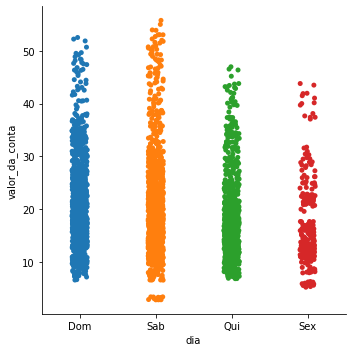

In [33]:
sns.catplot(x='dia',y='valor_da_conta',data=dados)

De acordo com os dados observados, em média, sábado parece ser o dia com o maior valor da conta, por outro lado, sexta é o dia com menor valor.

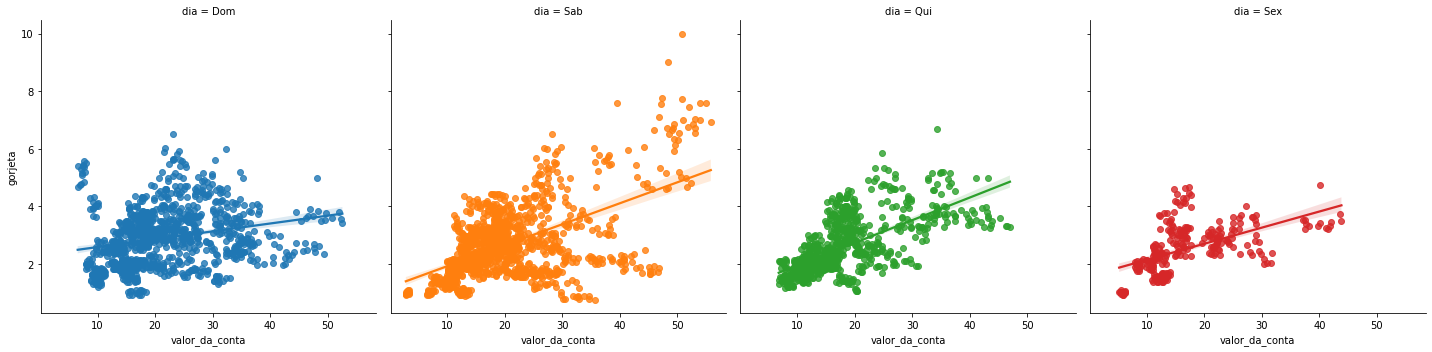

In [32]:
sns.lmplot(x='valor_da_conta',y='gorjeta',
            hue='dia',data=dados,col='dia') #gráfico com linha de tendência

In [35]:
#agrupando a média das colunas seleciondas por dias da semana
dados.groupby(['dia']).mean()[['valor_da_conta','gorjeta','porcentagem_gorjeta']]

,valor_da_conta,gorjeta,porcentagem_gorjeta
dia,,,
Dom,21.439133,2.902079,0.154953
Qui,17.724088,2.556177,0.154090
Sab,20.480249,2.690114,0.143604
Sex,17.215616,2.549960,0.163158


In [36]:
print('Frequência dos dias')
dados.dia.value_counts()

Frequência dos dias


Sab    1218
Dom    1064
Qui     868
Sex     266
Name: dia, dtype: int64

# Teste de hipótese

H<sup>nula</sup> = A distribuição do valor da conta é igual no sábado e no domingo<br>
H<sup>alt</sup> = A distribuição do valor da conta é não é igual no sábado e no domingo

In [ ]:
valor_conta_dom = dados.query('dia == "Dom"').valor_da_conta
valor_conta_sab = dados.query('dia == "Sab"').valor_da_conta

In [ ]:
_,pvalue = ranksums(valor_conta_dom,valor_conta_sab)

In [ ]:
print('Como o p-value é {:.4f} e é menor do que 0.05, rejeitamos a hipótese nula. Logo, a distribuição do valor da conta é estatisticamente diferente no sábado e no domingo'.format(pvalue))

Como o p-value é 0.0004 e é menor do que 0.05, rejeitamos a hipótese nula. Logo, a distribuição do valor da conta é estatisticamente diferente no sábado e no domingo


Como a distribuição é diferente no sábado e domingo, poderíamos talvez aplicar descontos no domingo na intenção de aumentar a quantidade de clientes e assim poderíamos ter estudado a distribuição de todos os dias da semana e ver em qual tem menor quantidade.

# Análise 4 - Hora do dia 

In [ ]:
dados.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

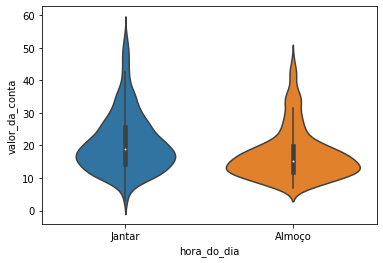

In [ ]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta',data=dados) #mostrando o acumulo dos dados próximos

Através do gráfico de violino percebe-se que os valores de conta mais comuns são um pouco mais altos no jantar e que a moda dos coisas casos estão próximas entre si (em um intervalo de 10 e 20 no valor da conta)

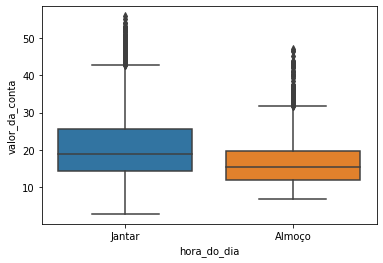

In [ ]:
sns.boxplot(x='hora_do_dia',y='valor_da_conta',data=dados)

Neste gráfico podemos ver que a mediana do valor da conta no jantar está mais próximo do 3 quartil do almoço, confirmando a diferença entre os grupos


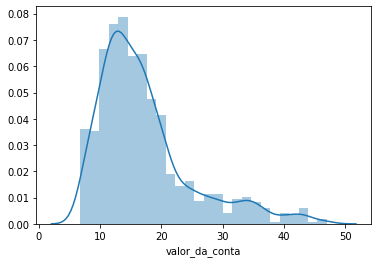

In [ ]:
almoço = dados.query('hora_do_dia=="Almoço"').valor_da_conta

sns.distplot(almoço) #frequência dos valores de conta no almoço

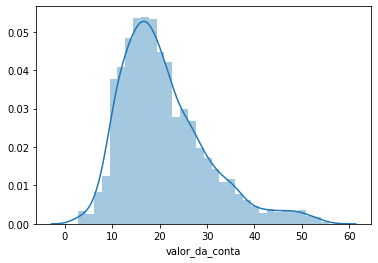

In [ ]:
jantar = dados.query('hora_do_dia=="Jantar"').valor_da_conta

sns.distplot(jantar) #frequência nos valores de compra do jantar

In [ ]:
dados.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem_gorjeta']]

,valor_da_conta,gorjeta,porcentagem_gorjeta
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


Apesar do valor da conta do jantar ser mais alta, a média da  porcentagem de gorjeta é menor em relação ao almoço. Isso acontece pois como eu mostro a seguir, o desvio padrão do valor da conta do jantar é maior e consequetemente o da porcentagem de gorjeta também. Então irei testar estatisticamente para verificar se essa diferença da amostra que tenho trazem evidências que apoiam ou não alguma hipótese.

In [ ]:
dados.groupby(['hora_do_dia']).std()[['valor_da_conta','gorjeta','porcentagem_gorjeta']]

,valor_da_conta,gorjeta,porcentagem_gorjeta
hora_do_dia,,,
Almoço,7.767156,0.928157,0.045777
Jantar,9.218549,1.124391,0.070945


# Teste de hipótese
H<sup>nula</sup> = A distribuição do valor da conta é a mesma entre o jantar e o almoço

H<sup>alt</sup> = A distribuição do valor da conta não é a mesma entre o jantar e o almoço

In [ ]:
ranksums(jantar,almoço)
print('Como o p-value é  {:.4f} e é menor  0.05, rejeitamos a hipótese nula, ou seja, o valor da conta entre janta e almoço não é a mesma'.format(pvalue))

Como o p-value é  0.0004 e é menor  0.05, rejeitamos a hipótese nula, ou seja, o valor da conta entre janta e almoço não é a mesma


# Conclusão

Este foi um estudo introdutório de Data Science, onde pudemos analisar as variáveis através de gráficos de dispersão, boxplots, de violino e histogramas, cada um com intuito específico de melhorar o entendimento dos dados.

Realizei teste de hipóteses com o propósito de poder generalizar meus dados, criei as hipóteses estatísticas para testa-las e pude tirar insights a partir disto.

Como havia dito, esse é um projeto de análise e visualização, qualquer dica ou sugestão é bem vinda.

Para isso e mais informações, aqui está <a href='https://www.linkedin.com/in/juliohenri'>meu LinkedIn</a>.